<a href="https://colab.research.google.com/github/ErickGross-19/Machine-Learning-Portfolio/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/RE_MACHINE_LEARNING_22/Restaurant_Reviews.tsv', delimiter='\t')
df

Mounted at /content/drive


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer



# Preprocess the data by removing stop words and tokenizing the text
stop_words = set(stopwords.words('english'))
reviews = []
for index, row in df.iterrows():
    text = row['Review']
    words = [word.lower() for word in nltk.word_tokenize(text) if word.lower() not in stop_words and word.isalpha()]
    reviews.append((words, row['Liked']))

# Divide the data into training and testing sets
train_reviews = reviews[:800]
test_reviews = reviews[800:]

# Create a sentiment analyzer using NLTK's built-in tools
sentim_analyzer = SentimentAnalyzer()

# Extract the features from the training data using NLTK's built-in tools
all_words_neg = sentim_analyzer.all_words([nltk.sentiment.util.mark_negation(review) for review, _ in train_reviews])
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(nltk.sentiment.util.extract_unigram_feats, unigrams=unigram_feats)

# Train a NaiveBayesClassifier on the training data
training_set = sentim_analyzer.apply_features(train_reviews)
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

# Evaluate the classifier on the testing data
testing_set = sentim_analyzer.apply_features(test_reviews)
accuracy = nltk.classify.util.accuracy(classifier, testing_set)
print('Accuracy:', accuracy)

# Use the VADER model from NLTK to analyze the sentiment of a new review
sid = SentimentIntensityAnalyzer()
new_review = 'The food was great but the service was terrible.'
scores = sid.polarity_scores(new_review)
print(scores)


Training classifier
Accuracy: 0.65
{'neg': 0.303, 'neu': 0.511, 'pos': 0.186, 'compound': -0.3818}


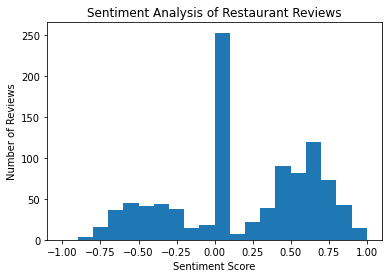

In [ ]:
import matplotlib.pyplot as plt
sentiment_scores = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Create a histogram of sentiment scores
fig, ax = plt.subplots()
ax.hist(sentiment_scores, bins=20, range=(-1, 1))
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiment Analysis of Restaurant Reviews')
plt.show()

In [ ]:
H = pd.read_csv('/content/drive/MyDrive/RE_MACHINE_LEARNING_22/Restaurant_Reviews.tsv', delimiter='\t')